#REde social + Rede Geografica

Objetivo: Detectar como interações sociais contribuem para crimes em locais específicos.

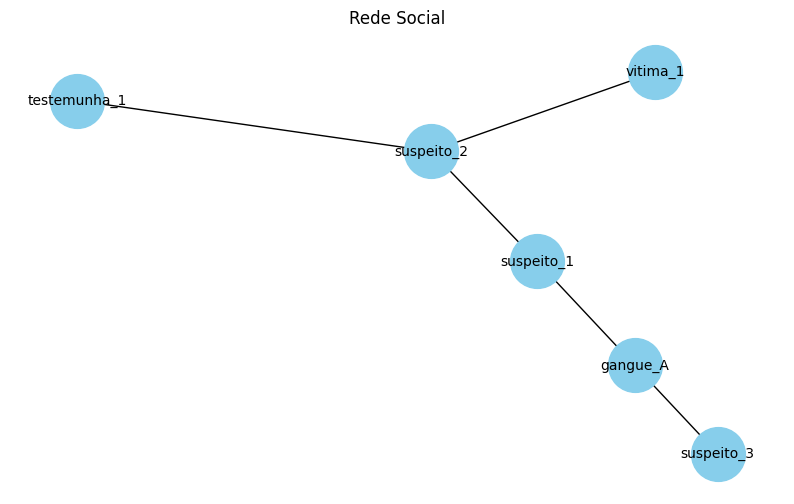

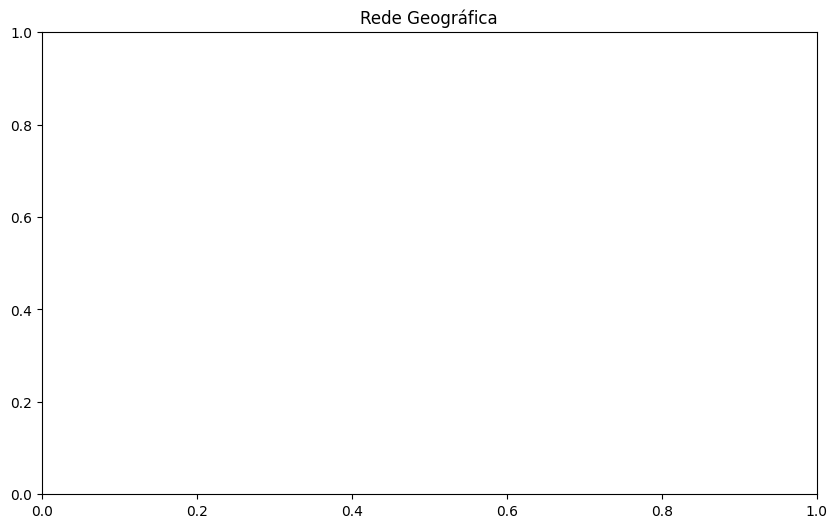

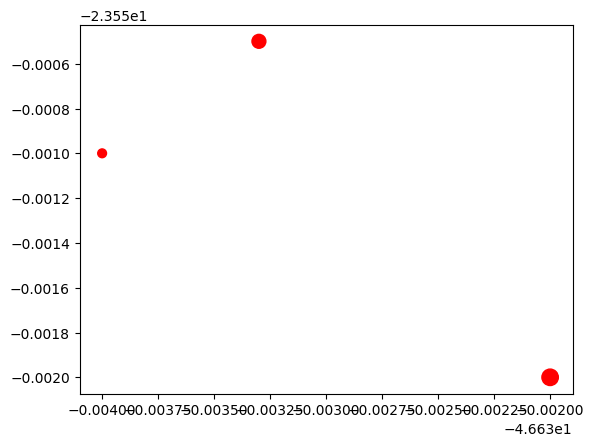

In [ ]:
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt

# Rede Social: Conexões entre indivíduos
social_graph = nx.Graph()
social_graph.add_edges_from([
    ("suspeito_1", "suspeito_2"),
    ("suspeito_2", "vitima_1"),
    ("suspeito_1", "gangue_A"),
    ("suspeito_3", "gangue_A"),
    ("testemunha_1", "suspeito_2")
])

# Rede Geográfica: Locais de crimes
geo_data = {
    "locais": ["rua_1", "rua_2", "rua_3"],
    "latitude": [-23.5505, -23.5510, -23.5520],
    "longitude": [-46.6333, -46.6340, -46.6320],
    "crimes": [5, 2, 7]
}
geo_df = gpd.GeoDataFrame(
    geo_data,
    geometry=gpd.points_from_xy(geo_data["longitude"], geo_data["latitude"])
)

# Plotando redes sociais
plt.figure(figsize=(10, 6))
plt.title("Rede Social")
nx.draw(social_graph, with_labels=True, node_color="skyblue", node_size=1500, font_size=10)
plt.show()

# Mapeando crimes geograficamente
plt.figure(figsize=(10, 6))
plt.title("Rede Geográfica")
geo_df.plot(marker="o", color="red", markersize=geo_df["crimes"] * 20)
plt.show()


In [ ]:
import folium
import networkx as nx
import geopandas as gpd
from folium.plugins import MarkerCluster

# Rede Social: Conexões entre indivíduos
social_graph = nx.Graph()
social_graph.add_edges_from([
    ("suspeito_1", "suspeito_2"),
    ("suspeito_2", "vitima_1"),
    ("suspeito_1", "gangue_A"),
    ("suspeito_3", "gangue_A"),
    ("testemunha_1", "suspeito_2")
])

# Rede Geográfica: Locais de crimes
geo_data = {
    "locais": ["Rua 1", "Rua 2", "Rua 3"],
    "latitude": [-23.5505, -23.5510, -23.5520],
    "longitude": [-46.6333, -46.6340, -46.6320],
    "crimes": [5, 2, 7]
}
geo_df = gpd.GeoDataFrame(
    geo_data,
    geometry=gpd.points_from_xy(geo_data["longitude"], geo_data["latitude"])
)

# Criar um mapa interativo
mapa = folium.Map(location=[-23.5505, -46.6333], zoom_start=14)

# Adicionar locais de crimes ao mapa
marker_cluster = MarkerCluster().add_to(mapa)
for _, row in geo_df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"Local: {row['locais']}<br>Crimes: {row['crimes']}",
        icon=folium.Icon(color="red" if row["crimes"] > 3 else "blue")
    ).add_to(marker_cluster)

# Exibir o mapa
mapa.save("rede_social_geografica.html")
mapa


#2. Rede de Infraestrutura + Rede de Chamadas de Emergência
Objetivo: Prever tempos de resposta e propor redistribuições de recursos.

python
Copiar código


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Rede de Infraestrutura
infra = pd.DataFrame({
    "delegacias": ["Delegacia_A", "Delegacia_B", "Delegacia_C"],
    "latitude": [-23.5500, -23.5520, -23.5540],
    "longitude": [-46.6300, -46.6320, -46.6340]
})

# Rede de Chamadas de Emergência
emergency_data = pd.DataFrame({
    "latitude": [-23.5505, -23.5515, -23.5530],
    "longitude": [-46.6330, -46.6345, -46.6350],
    "tempo_resposta": [5, 7, 10],
    "tipo_incidente": ["furto", "roubo", "homicídio"]
})

# Modelo de previsão de tempo de resposta
X = emergency_data[["latitude", "longitude"]]
y = emergency_data["tempo_resposta"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Previsão
y_pred = model.predict(X_test)
print("Previsão de tempos de resposta:", y_pred)


Previsão de tempos de resposta: [7.66]


In [ ]:
# Dados de infraestrutura
infra_data = {
    "locais": ["Delegacia A", "Delegacia B", "Delegacia C"],
    "latitude": [-23.5500, -23.5520, -23.5540],
    "longitude": [-46.6300, -46.6320, -46.6340]
}

# Dados de chamadas de emergência
emergency_data = {
    "incidentes": ["Furto", "Roubo", "Homicídio"],
    "latitude": [-23.5505, -23.5515, -23.5530],
    "longitude": [-46.6330, -46.6345, -46.6350],
    "tempo_resposta": [5, 7, 10]
}

infra_df = gpd.GeoDataFrame(
    infra_data, geometry=gpd.points_from_xy(infra_data["longitude"], infra_data["latitude"])
)
emergency_df = gpd.GeoDataFrame(
    emergency_data, geometry=gpd.points_from_xy(emergency_data["longitude"], emergency_data["latitude"])
)

# Criar o mapa
mapa = folium.Map(location=[-23.5510, -46.6330], zoom_start=13)

# Adicionar infraestrutura ao mapa
for _, row in infra_df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=row["locais"],
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(mapa)

# Adicionar chamadas de emergência ao mapa
for _, row in emergency_df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=row["tempo_resposta"],
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6,
        popup=f"Incidente: {row['incidentes']}<br>Tempo de Resposta: {row['tempo_resposta']} min"
    ).add_to(mapa)

# Exibir o mapa
mapa.save("infraestrutura_chamadas.html")
mapa


#3. Rede Temporal de Crimes + Rede de Transporte Público
Objetivo: Identificar clusters de crimes próximos ao transporte público.

Clusters identificados: [0 0 0 1 1]


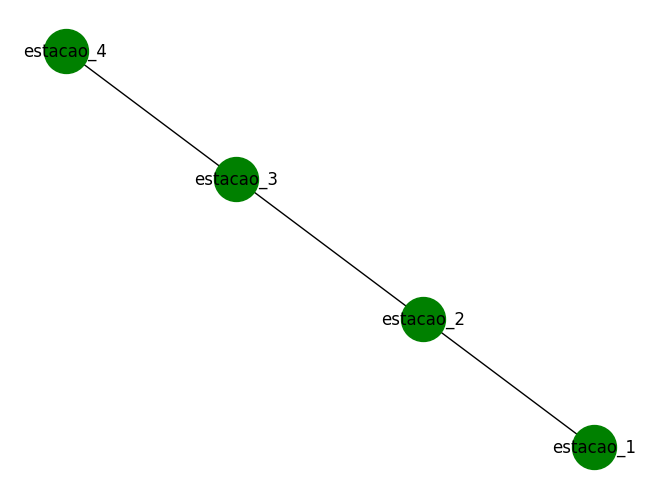

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Rede de Crimes
crime_data = np.array([
    [-23.5505, -46.6333],  # Crime 1
    [-23.5506, -46.6334],  # Crime 2
    [-23.5507, -46.6335],  # Crime 3
    [-23.5540, -46.6340],  # Crime 4
    [-23.5545, -46.6345]   # Crime 5
])

# Clusterizando crimes
db = DBSCAN(eps=0.001, min_samples=2).fit(crime_data)
labels = db.labels_
print("Clusters identificados:", labels)

# Rede de Transporte Público
transport_graph = nx.Graph()
transport_graph.add_edges_from([
    ("estacao_1", "estacao_2"),
    ("estacao_2", "estacao_3"),
    ("estacao_3", "estacao_4")
])

# Exibindo
nx.draw(transport_graph, with_labels=True, node_color="green", node_size=1000)
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Rede de crimes (coordenadas)
crime_data = np.array([
    [-23.5505, -46.6333],  # Crime 1
    [-23.5506, -46.6334],  # Crime 2
    [-23.5507, -46.6335],  # Crime 3
    [-23.5540, -46.6340],  # Crime 4
    [-23.5545, -46.6345]   # Crime 5
])

# Clustering de crimes
db = DBSCAN(eps=0.0005, min_samples=2).fit(crime_data)
labels = db.labels_

# Rede de transporte público
transport_data = {
    "estacoes": ["Estação 1", "Estação 2", "Estação 3"],
    "latitude": [-23.5500, -23.5510, -23.5520],
    "longitude": [-46.6300, -46.6310, -46.6320]
}

transport_df = gpd.GeoDataFrame(
    transport_data, geometry=gpd.points_from_xy(transport_data["longitude"], transport_data["latitude"])
)

# Criar o mapa
mapa = folium.Map(location=[-23.5510, -46.6330], zoom_start=14)

# Adicionar crimes ao mapa
for idx, (coord, cluster) in enumerate(zip(crime_data, labels)):
    folium.CircleMarker(
        location=coord,
        radius=8,
        color="red" if cluster != -1 else "gray",
        fill=True,
        fill_color="red" if cluster != -1 else "gray",
        fill_opacity=0.6,
        popup=f"Crime {idx + 1}<br>Cluster: {cluster}"
    ).add_to(mapa)

# Adicionar transporte ao mapa
for _, row in transport_df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=row["estacoes"],
        icon=folium.Icon(color="blue", icon="subway")
    ).add_to(mapa)

# Exibir o mapa
mapa.save("temporal_transporte.html")
mapa


#4. Rede de Sentimentos Públicos + Rede de Incidentes Criminais
Objetivo: Correlacionar sentimentos públicos com dados oficiais.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Sentimentos Públicos
sentiments = [
    "A segurança no bairro X está horrível",
    "Há muitos roubos na rua Y",
    "A polícia deveria patrulhar mais a região Z"
]

vectorizer = CountVectorizer(stop_words="portuguese")
X = vectorizer.fit_transform(sentiments)

lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

print("Tópicos identificados:")
for idx, topic in enumerate(lda.components_):
    print(f"Tópico {idx}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])}")


InvalidParameterError: The 'stop_words' parameter of CountVectorizer must be a str among {'english'}, an instance of 'list' or None. Got 'portuguese' instead.

#5. Rede de Policiais em Patrulha + Rede de Ocorrências
Objetivo: Otimizar rotas de patrulha.

In [ ]:
from scipy.spatial.distance import cdist

# Rede de Policiais
patrol_positions = np.array([
    [-23.5500, -46.6300],  # Viatura 1
    [-23.5520, -46.6320]   # Viatura 2
])

# Rede de Ocorrências
crime_positions = np.array([
    [-23.5505, -46.6330],
    [-23.5540, -46.6340]
])

distances = cdist(patrol_positions, crime_positions)
print("Distâncias entre viaturas e crimes:\n", distances)


Distâncias entre viaturas e crimes:
 [[0.00304138 0.00565685]
 [0.00180278 0.00282843]]


In [ ]:
import folium
import networkx as nx
import geopandas as gpd

# Dados das patrulhas (trajetos das viaturas)
patrulha_data = [
    {"viatura": "Viatura 1", "trajeto": [(-23.5500, -46.6300), (-23.5510, -46.6310), (-23.5520, -46.6320)]},
    {"viatura": "Viatura 2", "trajeto": [(-23.5530, -46.6330), (-23.5540, -46.6340), (-23.5550, -46.6350)]}
]

# Dados das ocorrências criminais
ocorrencia_data = {
    "locais": ["Rua 1", "Rua 2", "Rua 3", "Rua 4"],
    "latitude": [-23.5505, -23.5515, -23.5525, -23.5535],
    "longitude": [-46.6305, -46.6315, -46.6325, -46.6335],
    "tipo": ["Furto", "Roubo", "Homicídio", "Vandalismo"]
}

ocorrencia_df = gpd.GeoDataFrame(
    ocorrencia_data,
    geometry=gpd.points_from_xy(ocorrencia_data["longitude"], ocorrencia_data["latitude"])
)

# Criar o mapa inicial
mapa = folium.Map(location=[-23.5510, -46.6320], zoom_start=14)

# Adicionar os trajetos das patrulhas ao mapa
for patrulha in patrulha_data:
    trajeto = patrulha["trajeto"]
    folium.PolyLine(
        locations=trajeto,
        color="blue",
        weight=3,
        tooltip=patrulha["viatura"]
    ).add_to(mapa)

    # Adicionar marcadores para os pontos do trajeto
    for ponto in trajeto:
        folium.Marker(
            location=ponto,
            icon=folium.Icon(color="blue", icon="car"),
            tooltip=f"Patrulha: {patrulha['viatura']}"
        ).add_to(mapa)

# Adicionar as ocorrências criminais ao mapa
for _, row in ocorrencia_df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"Local: {row['locais']}<br>Tipo: {row['tipo']}",
        icon=folium.Icon(color="red", icon="exclamation-sign")
    ).add_to(mapa)

# Exibir o mapa
mapa.save("policiais_ocorrencias.html")
mapa


#6. Rede de Fluxo Econômico + Rede de Criminalidade
Objetivo: Investigar relação entre áreas economicamente ativas e crimes.



In [ ]:
# Fluxo Econômico
economic_graph = nx.Graph()
economic_graph.add_edges_from([
    ("centro_comercial_A", "centro_comercial_B"),
    ("centro_comercial_B", "mercado_C"),
    ("centro_comercial_A", "mercado_C")
])

# Rede de Criminalidade
crime_graph = nx.Graph()
crime_graph.add_edges_from([
    ("rua_1", "rua_2"),
    ("rua_2", "rua_3"),
    ("rua_3", "rua_1")
])

# Centralidade
economic_centrality = nx.betweenness_centrality(economic_graph)
crime_centrality = nx.betweenness_centrality(crime_graph)

print("Centralidade Econômica:", economic_centrality)
print("Centralidade de Crimes:", crime_centrality)


Centralidade Econômica: {'centro_comercial_A': 0.0, 'centro_comercial_B': 0.0, 'mercado_C': 0.0}
Centralidade de Crimes: {'rua_1': 0.0, 'rua_2': 0.0, 'rua_3': 0.0}
